### We have a dataset of 50 startups with their profits, location and different types of expenses. We would like to create a model to predict their profits

##### First, we need to download the data

In [7]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset.head()



,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


In [9]:
X[:, 3]

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

#### Since we have categorical data, we need to encode it somehow into numbers

In [4]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])



array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0], dtype=object)

In [6]:
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [7]:
X.shape

(50, 54)

In [8]:
X[0:3]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.3689780e+05, 4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0

In [9]:
# Avoiding the Dummy Variable
X = X[:, 1:]


In [10]:
X.shape

(50, 53)

In [11]:
X[0:3]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3689780e+05,
        4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0

### Splitting Variables

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [16]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

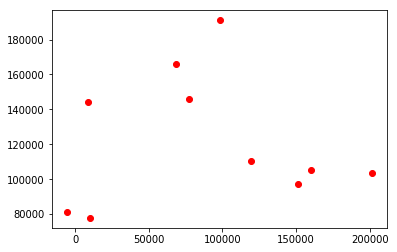

In [17]:
plt.scatter(y_pred, y_test, color = 'red')


In [18]:
y_pred[0:10]

array([201181.70644051,   8642.38329355,  77587.21842654,   9734.38039107,
        98210.69676771, 159830.04916283,  -5437.5086903 , 151590.23401124,
       119339.78233674,  68741.30463651])

In [19]:
y_test[0:10]

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

#### Is it necessary to include all the variables??
#### What if we have thousand variables?

# Let's reduce the number of Variables using Backward Elimination

In [22]:
# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
#we need the above step because OLS from statsmodel does not include the intercept
List_aux = [0, 1, 2, 3, 4, 5]
X_opt = X[:, List_aux]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     2.584
Date:                Wed, 13 Mar 2019   Prob (F-statistic):             0.0496
Time:                        11:32:28   Log-Likelihood:                -595.48
No. Observations:                  50   AIC:                             1201.
Df Residuals:                      45   BIC:                             1211.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.849e+04   2796.080     20.917      0.000    5.29e+04    6.41e+04
x1          5.849e+04   2796.080     20.917      0.000    5.29e+04    6.41e+04
x2          -8.13e+04   3.83e+04     -2.121      0.039   -1.59e+05   -4083.603
x3         -5.205e+04   3.83e+04     -1.358      0.181   -1.29e+05    2.52e+04
x4         -6.748e+04   3.83e+04     -1.760      0.085   -1.45e+05    9733.737
x5         -4.721e+04   3.83e+04     -1.232      0.225   -1.24e+05       3e+04
==============================================================================
Omnibus:                        1.208   Durbin-Watson:                   0.460
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                0.481
Skew:                          -0.012   Prob(JB):                        0.786
Kurtosis:                       3.480   Cond. No.                     4.80e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.34e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### To do it in a programatic way you need to select the variable with the highes p-value and exclude it

In [23]:
print(regressor_OLS.pvalues)

[8.14795964e-25 8.14795964e-25 3.94990217e-02 1.81360883e-01
 8.51680550e-02 2.24519382e-01]


In [24]:
indx=np.argmax(regressor_OLS.pvalues)
List_aux.pop(indx)

5

In [25]:
List_aux

[0, 1, 2, 3, 4]

#### But here we will do it manually in order to see what is going on

In [26]:
#X_opt = X[:, List_aux]
X_opt = X[:, [0,1,3,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.809
Date:                Wed, 13 Mar 2019   Prob (F-statistic):              0.159
Time:                        11:35:02   Log-Likelihood:                -597.87
No. Observations:                  50   AIC:                             1204.
Df Residuals:                      46   BIC:                             1211.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.762e+04   2869.394     20.082      0.000    5.18e+04    6.34e+04
x1          5.762e+04   2869.394     20.082      0.000    5.18e+04    6.34e+04
x2         -5.032e+04   3.98e+04     -1.266      0.212    -1.3e+05    2.97e+04
x3         -6.575e+04   3.98e+04     -1.654      0.105   -1.46e+05    1.43e+04
x4         -4.548e+04   3.98e+04     -1.144      0.259   -1.26e+05    3.45e+04
==============================================================================
Omnibus:                        0.765   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.209
Skew:                          -0.073   Prob(JB):                        0.901
Kurtosis:                       3.281   Cond. No.                     4.94e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.1e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
X_opt = X[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.809
Date:                Wed, 13 Mar 2019   Prob (F-statistic):              0.159
Time:                        11:35:07   Log-Likelihood:                -597.87
No. Observations:                  50   AIC:                             1204.
Df Residuals:                      46   BIC:                             1211.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.152e+05   5738.788     20.082      0.000    1.04e+05    1.27e+05
x1         -5.032e+04   3.98e+04     -1.266      0.212    -1.3e+05    2.97e+04
x2         -6.575e+04   3.98e+04     -1.654      0.105   -1.46e+05    1.43e+04
x3         -4.548e+04   3.98e+04     -1.144      0.259   -1.26e+05    3.45e+04
==============================================================================
Omnibus:                        0.765   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.209
Skew:                          -0.073   Prob(JB):                        0.901
Kurtosis:                       3.281   Cond. No.                         7.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
X_opt = X[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.299
Date:                Wed, 13 Mar 2019   Prob (F-statistic):              0.283
Time:                        11:35:09   Log-Likelihood:                -599.31
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      47   BIC:                             1210.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.139e+05   5782.556     19.693      0.000    1.02e+05    1.26e+05
x1         -4.895e+04   4.05e+04     -1.209      0.233    -1.3e+05    3.25e+04
x2         -4.411e+04   4.05e+04     -1.090      0.281   -1.26e+05    3.73e+04
==============================================================================
Omnibus:                        0.323   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.851   Jarque-Bera (JB):                0.039
Skew:                          -0.058   Prob(JB):                        0.981
Kurtosis:                       3.072   Cond. No.                         7.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
X_opt = X[:, [0, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.404
Date:                Wed, 13 Mar 2019   Prob (F-statistic):              0.242
Time:                        11:35:11   Log-Likelihood:                -599.93
No. Observations:                  50   AIC:                             1204.
Df Residuals:                      48   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.13e+05   5734.430     19.701      0.000    1.01e+05    1.25e+05
x1         -4.805e+04   4.05e+04     -1.185      0.242    -1.3e+05    3.35e+04
==============================================================================
Omnibus:                        0.115   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.944   Jarque-Bera (JB):                0.007
Skew:                          -0.015   Prob(JB):                        0.996
Kurtosis:                       2.949   Cond. No.                         7.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The most important variable is R+D!